In [93]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn

# Exploratory Data Analysis

In [94]:
df = pd.read_csv("../data/combined_data.csv")
df.head()

,Unnamed: 0,Country,Region,Year,Status,PR rating,CL rating,PR,CL,Total,...,GDP real rates of growth (percent),Population aged 0 to 14 years old (percentage),Population aged 60+ years old (percentage),Population density,Population mid-year estimates (millions),Population mid-year estimates for females (millions),Population mid-year estimates for males (millions),Sex ratio (males per 100 females),Surface area (thousand km2),Percentage of individuals using the internet
0,932,Afghanistan,Asia,2015,NF,6,6,11,13,24,...,-2.5,46.3,3.7,52.1,33.83,16.73,17.1,102.2,NaN,8.3
1,876,Afghanistan,Asia,2018,NF,5,6,12,14,26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,850,Afghanistan,Asia,2019,NF,5,6,13,14,27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,679,Afghanistan,Asia,2020,NF,5,6,13,14,27,...,-2.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,508,Afghanistan,Asia,2021,NF,5,6,13,14,27,...,-20.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
df_region = df.groupby("Region", dropna = False)["Total"].describe().reset_index().sort_values(by = "mean", ascending = False)
df_region.head(10)

,Region,count,mean,std,min,25%,50%,75%,max
4,Europe,247.0,86.765182,12.858893,42.0,83.00,90.0,96.0,100.0
1,Americas,192.0,72.729167,21.161547,12.0,64.00,79.0,89.0,99.0
2,Asia,230.0,63.947826,24.665923,6.0,47.25,63.0,84.0,99.0
0,Africa,333.0,42.120120,25.434608,1.0,21.00,40.0,64.0,92.0
3,Eurasia,75.0,29.000000,21.615810,2.0,10.00,23.0,53.5,64.0
5,Middle East,73.0,28.616438,18.059031,7.0,17.00,25.0,37.0,80.0


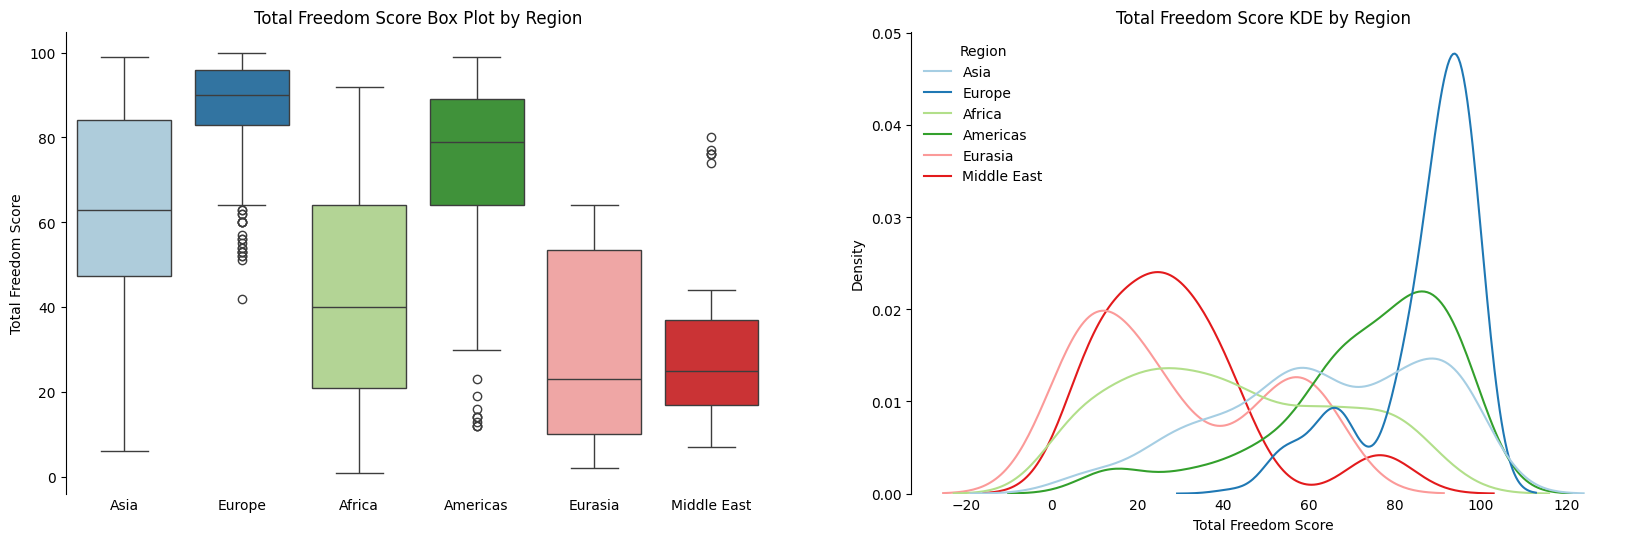

In [96]:
fig, ax = plt.subplots(1, 2, figsize = (20, 6))

sns.boxplot(data = df, x = "Region", y = "Total", hue = "Region", palette = "Paired", ax = ax[0])
ax[0].set_title("Total Freedom Score Box Plot by Region")
sns.despine(top = True, right = True, bottom = True, ax = ax[0])
ax[0].tick_params(axis = 'x', length = 0)   
ax[0].set_xlabel("")
ax[0].set_ylabel("Total Freedom Score")

sns.kdeplot(data = df, x = "Total", hue = "Region", palette = "Paired", ax = ax[1], common_norm = False)
ax[1].set_title("Total Freedom Score KDE by Region")
sns.despine(top = True, right = True, bottom = True, ax = ax[1])
ax[1].tick_params(axis = 'x', length = 0)   
ax[1].set_xlabel("Total Freedom Score")
ax[1].set_ylabel("Density")
sns.move_legend(loc = "upper left", obj = ax[1], frameon = False)

plt.show()

In [97]:
un_cols = df.columns[10:]
freedom_cols = df.columns[7:10]
pr_corr = []
cl_corr = []
total_corr = []
corr_lists = [pr_corr, cl_corr, total_corr]

for corr_list, fcol in zip(corr_lists, freedom_cols):
    for uncol in un_cols:
        corr = df[fcol].corr(df[uncol])
        corr_list.append(corr)
    
print(freedom_cols[0])
print(un_cols[0])
print(pr_corr[0])

PR
Gross enrollment ratio - Lower secondary level (female)
0.48956688311938495


Personal Rights Score  -  Gross enrollment ratio - Lower secondary level (female)
Personal Rights Score  -  Gross enrollment ratio - Lower secondary level (male)
Personal Rights Score  -  Gross enrollment ratio - Upper secondary level (female)
Personal Rights Score  -  Gross enrollment ratio - Upper secondary level (male)
Personal Rights Score  -  Theft at the national level, rate per 100,000 population
Personal Rights Score  -  Total Sexual Violence at the national level, rate per 100,000
Personal Rights Score  -  Safely managed sanitation facilities, total (Proportion of population with access)
Personal Rights Score  -  Population aged 0 to 14 years old (percentage)
Personal Rights Score  -  Population aged 60+ years old (percentage)
Personal Rights Score  -  Percentage of individuals using the internet

Civil Liberties Score  -  Gross enrollment ratio - Lower secondary level (female)
Civil Liberties Score  -  Gross enrollment ratio - Lower secondary level (male)
Civil Liberties Scor

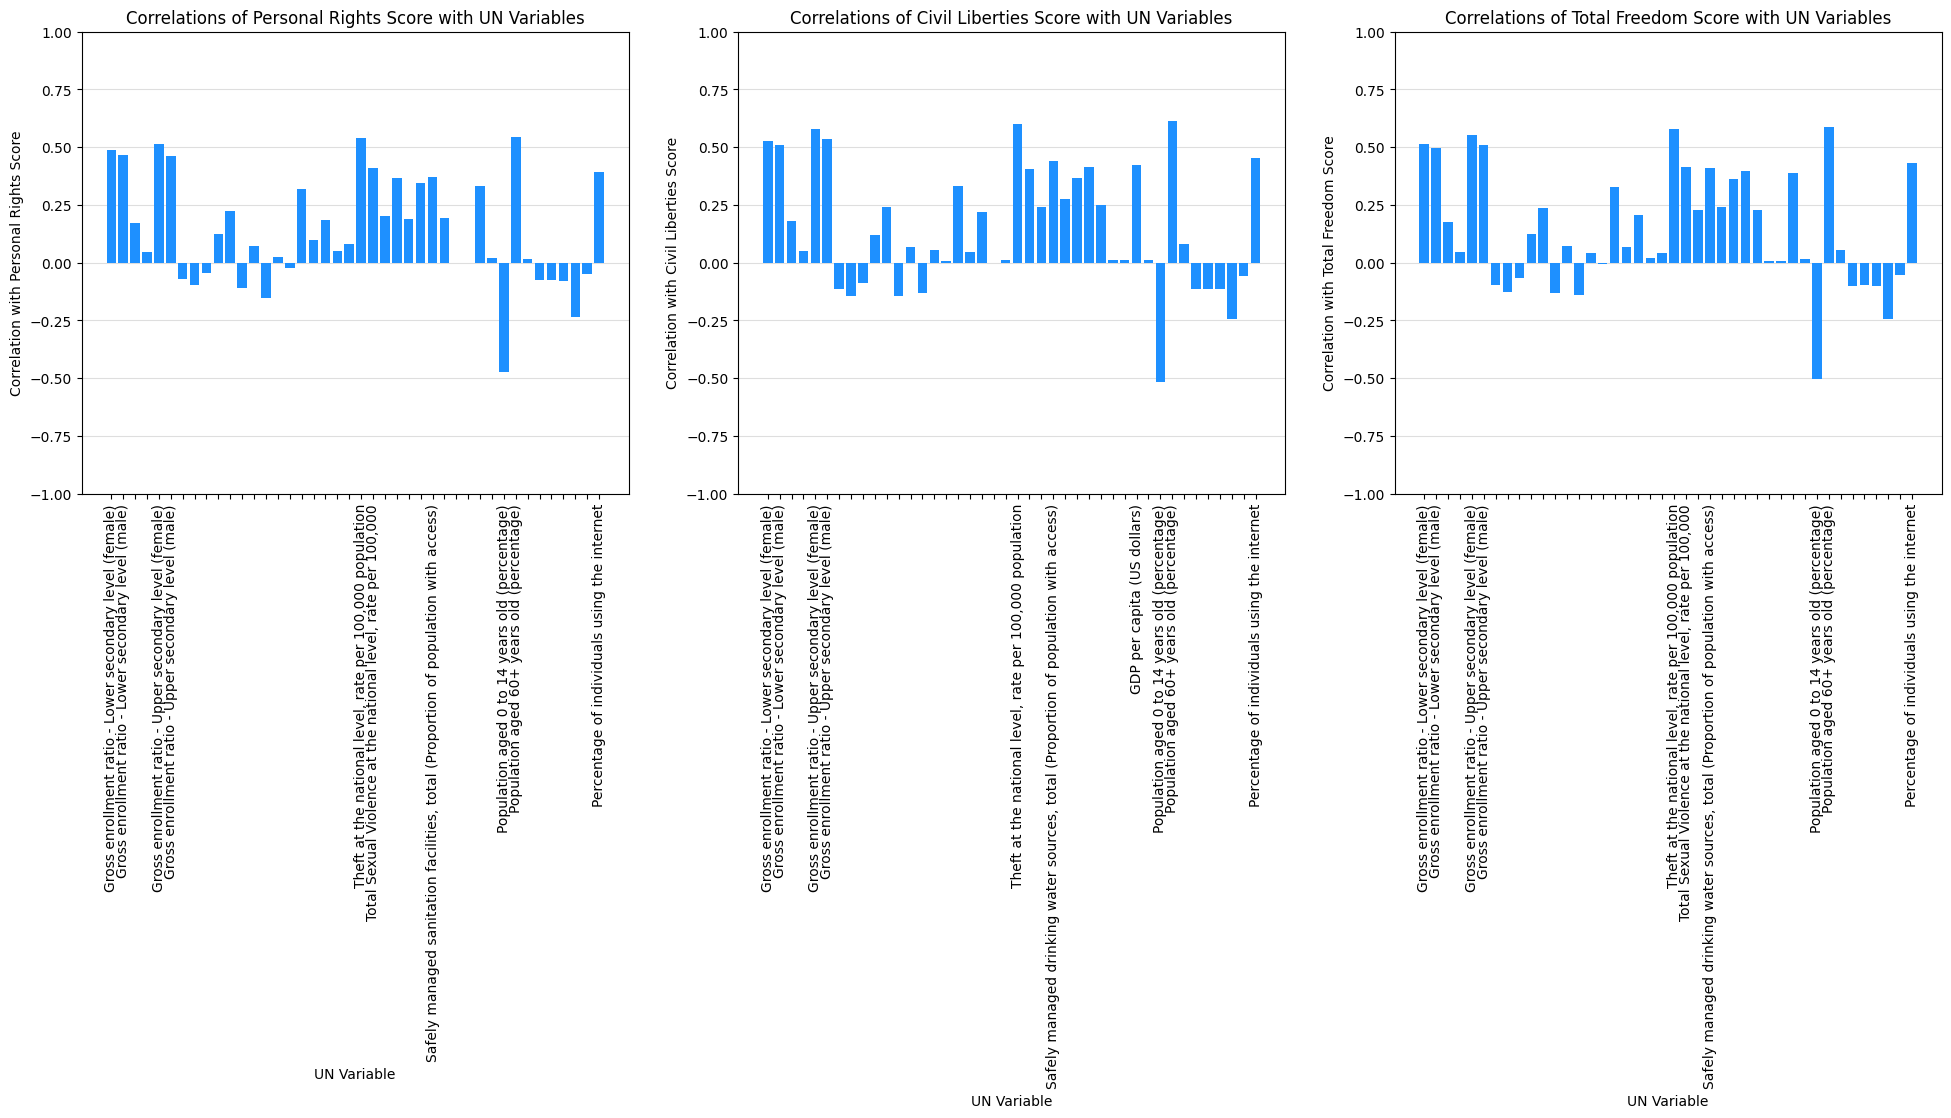

In [98]:
fig, axs = plt.subplots(1, 3, figsize=(24,6))
axs = axs.flatten()

for freedom_corr, ax, free_type in zip([pr_corr, cl_corr, total_corr], 
                                       axs, 
                                       ["Personal Rights Score", 
                                        "Civil Liberties Score", "Total Freedom Score"]):

    ax.bar(un_cols, freedom_corr, color = 'dodgerblue', zorder = 2)
    ax.set_xlabel('UN Variable')
    ax.set_ylabel(f'Correlation with {free_type}')
    ax.set_title(f'Correlations of {free_type} with UN Variables')
    ax.grid(axis = 'y', color = "lightgray", alpha = 0.75, zorder = 0)

    freedom_corr = np.array(freedom_corr)
    top10_indices = np.argsort(np.abs(freedom_corr))[-10:][::-1]
    top_un_cols = [un_cols[i] for i in top10_indices]
    ax.set_xticks(range(len(un_cols)))
    labels = [col if col in top_un_cols else "" for col in un_cols]
    for label in labels:
        if label != "":
            print(free_type, " - ", label)
    ax.set_xticklabels(labels, rotation = 90)
    ax.set_ylim(-1, 1)
    print("")

plt.show()


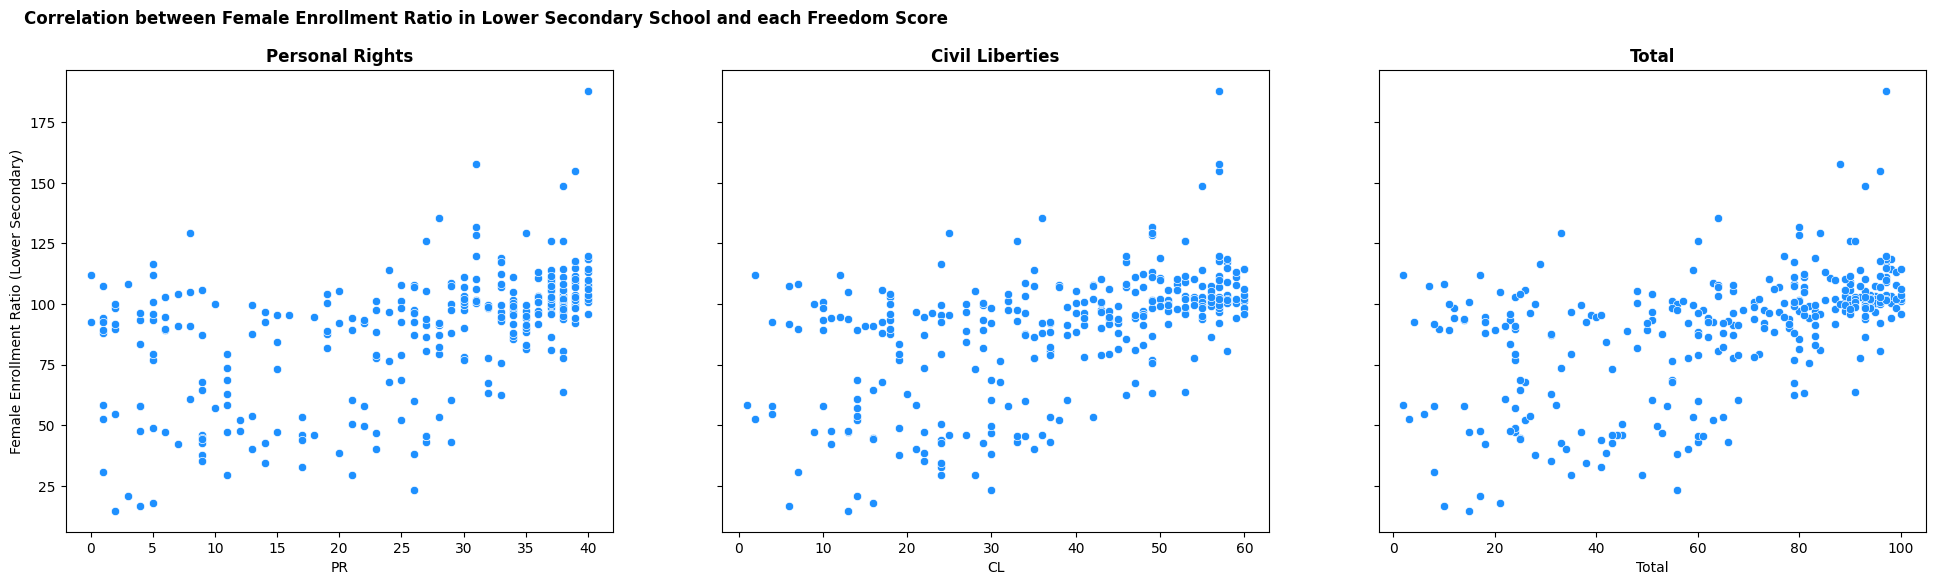

In [99]:
fig, axs = plt.subplots(1, 3, figsize=(24,6), sharey = True)
axs = axs.flatten()


for ax, frtype, free_type in zip(axs, ["PR", "CL", "Total"], ["Personal Rights", 
                                        "Civil Liberties", "Total"]):
    sns.scatterplot(x = df[frtype], y = df["Gross enrollment ratio - Lower secondary level (female)"], color = "dodgerblue", ax = ax)
    ax.set_ylabel("Female Enrollment Ratio (Lower Secondary)")
    ax.set_title(free_type, weight = "bold")

plt.suptitle("Correlation between Female Enrollment Ratio in Lower Secondary School and each Freedom Score", x = 0.3, weight = "bold")
plt.show()

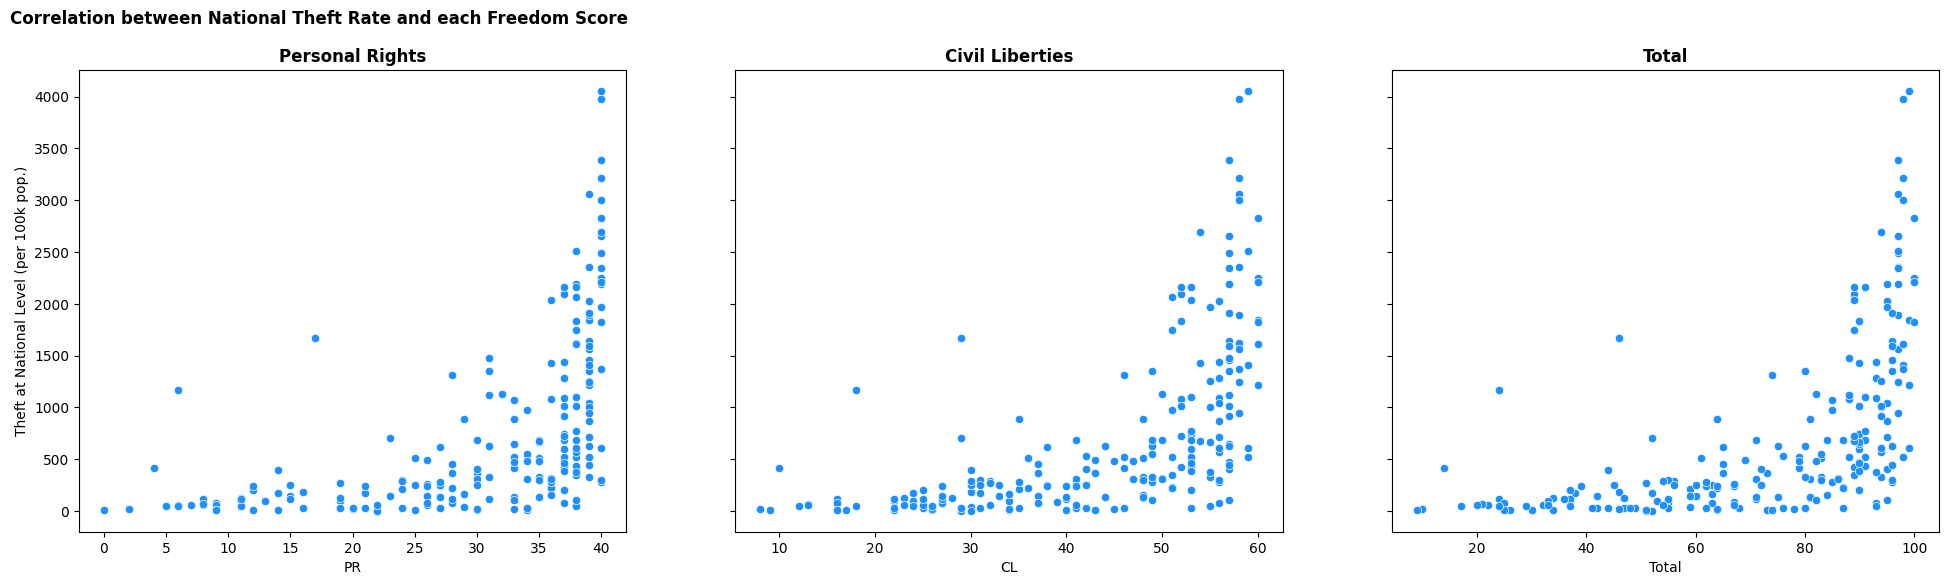

In [100]:
fig, axs = plt.subplots(1, 3, figsize=(24,6), sharey = True)
axs = axs.flatten()


for ax, frtype, free_type in zip(axs, ["PR", "CL", "Total"], ["Personal Rights", 
                                        "Civil Liberties", "Total"]):
    sns.scatterplot(x = df[frtype], y = df["Theft at the national level, rate per 100,000 population"], color = "dodgerblue", ax = ax)
    ax.set_ylabel("Theft at National Level (per 100k pop.)")
    ax.set_title(free_type, weight = "bold")

plt.suptitle("Correlation between National Theft Rate and each Freedom Score", x = 0.225, weight = "bold")
plt.show()

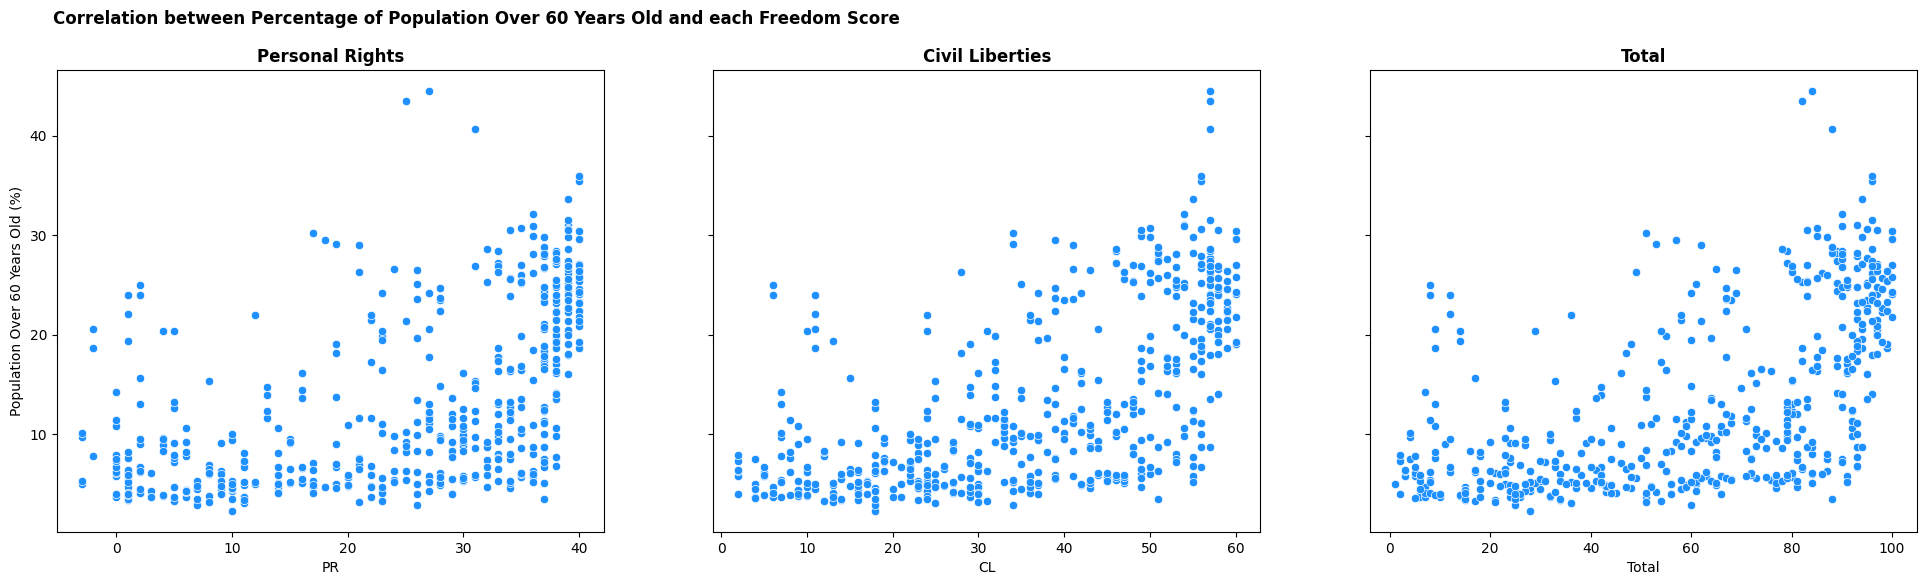

In [101]:
fig, axs = plt.subplots(1, 3, figsize=(24,6), sharey = True)
axs = axs.flatten()


for ax, frtype, free_type in zip(axs, ["PR", "CL", "Total"], ["Personal Rights", 
                                        "Civil Liberties", "Total"]):
    sns.scatterplot(x = df[frtype], y = df["Population aged 60+ years old (percentage)"], color = "dodgerblue", ax = ax)
    ax.set_ylabel("Population Over 60 Years Old (%)")
    ax.set_title(free_type, weight = "bold")

plt.suptitle("Correlation between Percentage of Population Over 60 Years Old and each Freedom Score", x = 0.3, weight = "bold")
plt.show()

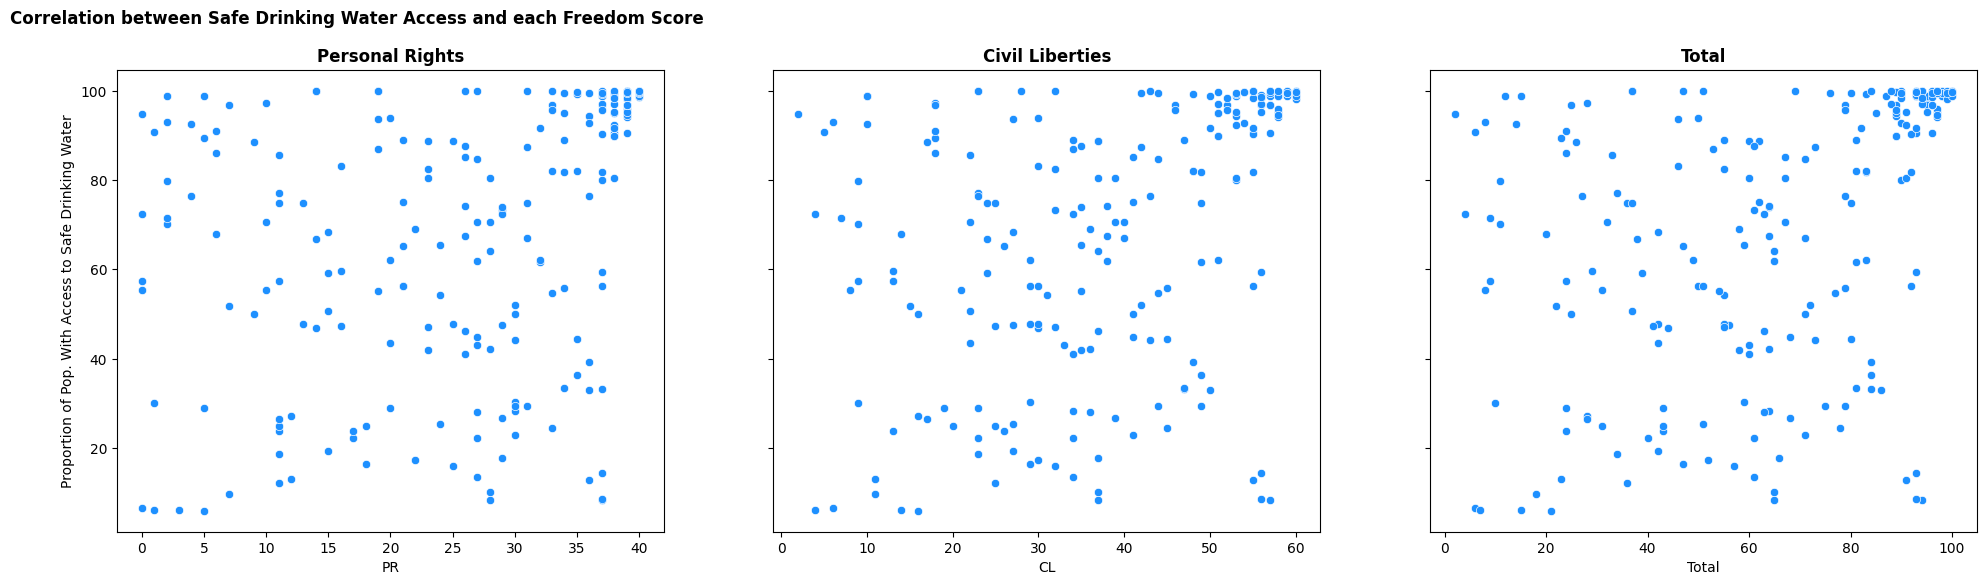

In [102]:
fig, axs = plt.subplots(1, 3, figsize=(24,6), sharey = True)
axs = axs.flatten()


for ax, frtype, free_type in zip(axs, ["PR", "CL", "Total"], ["Personal Rights", 
                                        "Civil Liberties", "Total"]):
    sns.scatterplot(x = df[frtype], y = df["Safely managed drinking water sources, total (Proportion of population with access)"], color = "dodgerblue", ax = ax)
    ax.set_ylabel("Proportion of Pop. With Access to Safe Drinking Water")
    ax.set_title(free_type, weight = "bold")

plt.suptitle("Correlation between Safe Drinking Water Access and each Freedom Score", x = 0.225, weight = "bold")
plt.show()

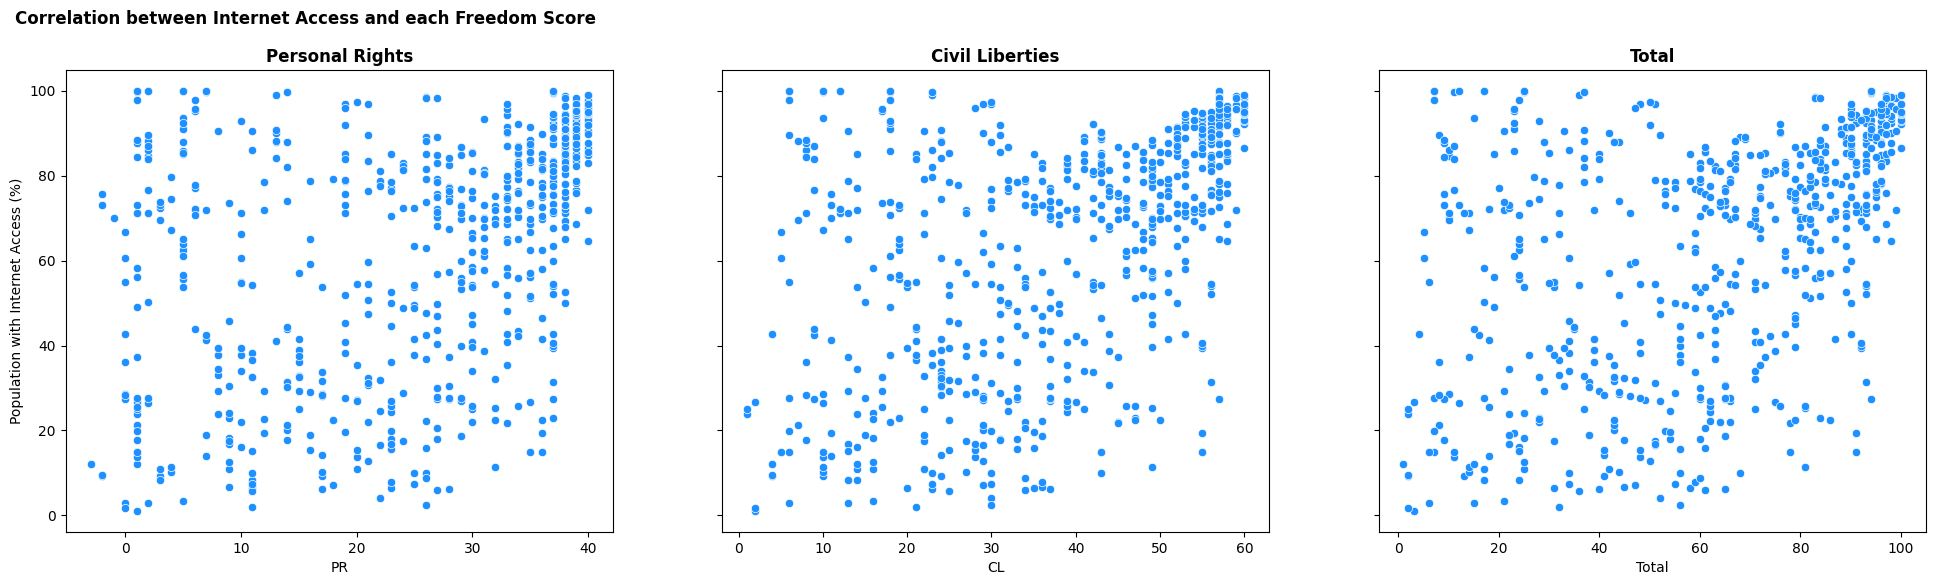

In [103]:
fig, axs = plt.subplots(1, 3, figsize=(24,6), sharey = True)
axs = axs.flatten()


for ax, frtype, free_type in zip(axs, ["PR", "CL", "Total"], ["Personal Rights", 
                                        "Civil Liberties", "Total"]):
    sns.scatterplot(x = df[frtype], y = df["Percentage of individuals using the internet"], color = "dodgerblue", ax = ax)
    ax.set_ylabel("Population with Internet Access (%)")
    ax.set_title(free_type, weight = "bold")

plt.suptitle("Correlation between Internet Access and each Freedom Score", x = 0.225, weight = "bold")
plt.show()